In [1561]:
# Importing basic libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the Datasets

In [1562]:
# KaraFun Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Alcoris0987/CLS-Project/main/karafuncatalog.csv", sep=";")

In [1563]:
# KaraFun YouTube Dataset
ytdf = pd.read_excel("https://raw.githubusercontent.com/Alcoris0987/CLS-Project/main/karafun_top_50_with_styles.xlsx")

In [1564]:
# Spotify Dataset
spotify_df = pd.read_excel("https://raw.githubusercontent.com/Alcoris0987/CLS-Project/main/spotifydata.xlsx")

# Analysing the KaraFun Data

In [1565]:
# Checking the dataframe.
df.head(3)

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages
0,56442,Shallow,A Star is Born,2018,1,0,2018-10-15,"TV & movie soundtrack,Pop,Folk,Country,Rock,Duet",English
1,49375,Tennessee Whiskey,Chris Stapleton,2015,0,0,2015-07-21,"Blues,Country,Soul,Rock",English
2,6534,Sweet Caroline,Neil Diamond,1969,0,0,2011-05-31,Pop,English


In [1566]:
# We check if suggested but not added songs are included in the CSV file.

# "TT" is one of the suggested but not added songs.
song = ['TT']
df.query('Title==@song')

# We see that it is not included in the dataframe.

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages


In [1567]:
# "Bohemian Rhapsody" is one of the added songs.
song = ['Bohemian Rhapsody']
df.query('Title==@song')

# We see that it is included in the dataframe.

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages
3,12617,Bohemian Rhapsody,Queen,1975,0,0,2008-07-21,Rock,English
7855,34758,Bohemian Rhapsody,Angelina Jordan,2020,0,0,2020-09-18,Jazz,English
14129,56929,Bohemian Rhapsody,Randy Coleman,2017,0,0,2019-01-08,"Folk,Rock",English
16724,15541,Bohemian Rhapsody,The Braids,1996,0,0,2011-05-30,"R&B,TV & movie soundtrack",English
20074,31613,Bohemian Rhapsody,Richard Cheese,2010,0,0,2011-05-31,"Jazz,Humor",English
25673,62074,Bohemian Rhapsody,Pentatonix,2017,0,0,2020-08-17,"Rock,Pop",English
28337,38935,Bohemian Rhapsody,Zac Brown Band,2014,0,0,2016-08-26,"Rock,Country",English
30071,26907,Bohemian Rhapsody,The Muppets,2009,0,0,2011-05-30,"Humor,Rock",English
32453,32098,Bohemian Rhapsody,Glee,2010,0,0,2011-09-09,"TV & movie soundtrack,Pop,Rock",English


In [1568]:
# Checking the datatypes of the columns.
df.dtypes

Id             int64
Title         object
Artist        object
Year           int64
Duo            int64
Explicit       int64
Date Added    object
Styles        object
Languages     object
dtype: object

In [1569]:
# Checking if there are null values.
df.isnull().any()

Id            False
Title          True
Artist        False
Year          False
Duo           False
Explicit      False
Date Added    False
Styles        False
Languages     False
dtype: bool

In [1570]:
# Checking the row(s) with the null value(s).
nulldf = df[df['Title'].isnull()]
nulldf

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages
44767,12876,NaN,Zazie,2007,0,0,2016-02-25,French pop,French


In [1571]:
# Removing the row with the null title and checking the length differenec.
print(len(df.index))
df = df.dropna()
print(len(df.index))

47768
47767


In [1572]:
# Checking if there are duplicated rows.
df.duplicated().any()

False

In [1573]:
# Checking the data.
df.describe()

,Id,Year,Duo,Explicit
count,47767.000000,47767.000000,47767.000000,47767.000000
mean,37949.278623,1995.795926,0.060314,0.022777
std,18725.549658,23.992985,0.238069,0.149194
min,5024.000000,1000.000000,0.000000,0.000000
25%,21603.000000,1982.000000,0.000000,0.000000
50%,38610.000000,2002.000000,0.000000,0.000000
75%,54223.500000,2012.000000,0.000000,0.000000
max,69575.000000,2022.000000,1.000000,1.000000


# Analysing the Karafun YouTube Top 50 data

In [1574]:
# Checking the dataframe.
ytdf.head(3)

,Column1,index,video_id,channel_id,published_date,video_title,video_description,likes,views,comment_count,Styles
0,0,0,F2vbPzCGj6c,UCbqcG1rdt9LMwOJN4PyGTKg,2012-04-03 09:48:45,A Thousand Years - Christina Perri | Karaoke V...,Download MP3: https://www.karaoke-version.com/...,92468.0,25295671.0,4250.0,"Pop,TV & movie soundtrack"
1,1,1,BvW4efU0HTQ,UCbqcG1rdt9LMwOJN4PyGTKg,2013-05-14 13:22:16,Karaoke Colgando en tus manos (duo) - Carlos B...,Descargar MP3: https://www.version-karaoke.es/...,44774.0,25660436.0,792.0,"Duet,Latin Music,Pop"
2,2,2,81_2Xb0XB_E,UCbqcG1rdt9LMwOJN4PyGTKg,2011-11-07 16:42:27,Zombie - The Cranberries | Karaoke Version | K...,Download MP3: https://www.karaoke-version.com/...,96514.0,27130172.0,1617.0,"Rock,Alternative"


In [1575]:
# Checking the datatypes of columns.
ytdf.dtypes

Column1                       int64
index                         int64
video_id                     object
channel_id                   object
published_date       datetime64[ns]
video_title                  object
video_description            object
likes                       float64
views                       float64
comment_count               float64
Styles                       object
dtype: object

In [1576]:
# Checking if there are null values.
ytdf.isnull().any()

Column1              False
index                False
video_id             False
channel_id           False
published_date       False
video_title           True
video_description     True
likes                 True
views                 True
comment_count         True
Styles                True
dtype: bool

In [1577]:
# Cleaning the dataframe to address the null values.
ytdf.drop('Column1', inplace=True, axis=1)
ytdf.drop('index', inplace=True, axis=1)
ytdf = ytdf.dropna()
ytdf.head(3)

,video_id,channel_id,published_date,video_title,video_description,likes,views,comment_count,Styles
0,F2vbPzCGj6c,UCbqcG1rdt9LMwOJN4PyGTKg,2012-04-03 09:48:45,A Thousand Years - Christina Perri | Karaoke V...,Download MP3: https://www.karaoke-version.com/...,92468.0,25295671.0,4250.0,"Pop,TV & movie soundtrack"
1,BvW4efU0HTQ,UCbqcG1rdt9LMwOJN4PyGTKg,2013-05-14 13:22:16,Karaoke Colgando en tus manos (duo) - Carlos B...,Descargar MP3: https://www.version-karaoke.es/...,44774.0,25660436.0,792.0,"Duet,Latin Music,Pop"
2,81_2Xb0XB_E,UCbqcG1rdt9LMwOJN4PyGTKg,2011-11-07 16:42:27,Zombie - The Cranberries | Karaoke Version | K...,Download MP3: https://www.karaoke-version.com/...,96514.0,27130172.0,1617.0,"Rock,Alternative"


In [1578]:
# Checking again if there aer null values.
ytdf.isnull().any()

video_id             False
channel_id           False
published_date       False
video_title          False
video_description    False
likes                False
views                False
comment_count        False
Styles               False
dtype: bool

In [1579]:
# Checking if there are duplicated rows.
ytdf.duplicated().any()

False

In [1580]:
# Checking the data.
ytdf.describe()

,likes,views,comment_count
count,50.00000,5.000000e+01,50.000000
mean,26534.88000,1.023476e+07,560.440000
std,18284.22839,6.404785e+06,635.905081
min,7109.00000,3.597127e+06,91.000000
25%,15465.25000,5.600790e+06,277.250000
50%,20589.50000,8.562462e+06,410.500000
75%,33090.00000,1.137276e+07,581.500000
max,96514.00000,2.732419e+07,4250.000000


# Analysing the Spotify Data

In [1581]:
# Checking the dataframe.
spotify_df.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,instrumentalness,key,liveness,mode,speechiness
0,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,596,653,213947,0.0,B,811,Minor,409
1,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,975,377,334570,208.0,E,102,Minor,387
2,R&B,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,69,359,761,219120,0.0,F,945,Minor,539


In [1582]:
# Checking the datatypes of columns.
spotify_df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness          int64
danceability          int64
duration_ms           int64
instrumentalness    float64
key                  object
liveness              int64
mode                 object
speechiness           int64
dtype: object

In [1583]:
# Checking if there are null values.
spotify_df.isnull().any()

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
instrumentalness    False
key                 False
liveness            False
mode                False
speechiness         False
dtype: bool

In [1584]:
# Checking if there are duplicated rows.
spotify_df.duplicated().any()

False

In [1585]:
# Checking the data.
spotify_df.describe()

,popularity,acousticness,danceability,duration_ms,instrumentalness,liveness,speechiness
count,10256.000000,10256.000000,10256.000000,10256.000000,10256.000000,10256.000000,10256.000000
mean,70.406299,379.036759,576.099746,223152.574493,91.882562,350.498537,531.058405
std,5.141583,273.597025,220.176062,50883.939706,201.760466,297.701363,173.955548
min,65.000000,0.000000,3.000000,41455.000000,0.000000,1.000000,331.000000
25%,66.000000,153.000000,487.000000,192191.000000,0.000000,117.000000,388.000000
50%,69.000000,311.000000,621.000000,216773.000000,0.000096,212.500000,479.000000
75%,73.000000,583.000000,731.000000,246088.000000,56.000000,583.000000,636.000000
max,99.000000,999.000000,978.000000,592920.000000,998.000000,999.000000,999.000000


# Cleaning KaraFun data

In [1586]:
df.sort_values(by="Date Added").head(3)

# There are invalid values in the 'Date Added' column. 

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages
19712,25325,Canto della Terra,Andrea Bocelli,1999,0,0,0000-00-00,Pop,Italian
44576,31419,La chanson de l'adieu,Nana Mouskouri,1994,0,0,0000-00-00,French pop,French
39256,67695,No Limit,Hermes House Band,2009,0,0,0000-00-00,Pop,English


In [1587]:
# Removing invalid 'Date Added' values and songs added after 2019 for comparison with the Spotify dataset.

df = df.loc[df['Date Added'] != '0000-00-00']
df = df.loc[df['Date Added'] < '2020-01-01']
df.sort_values(by="Date Added").head(3)

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages
9634,6698,"Oh, Happy Day",Elvis Presley,1970,0,0,2007-05-04,Gospel,English
7243,10452,Everybody Loves Somebody Sometime,Frank Sinatra,1964,0,0,2007-05-04,"Love,Jazz,Pop",English
4263,7091,Concrete Angel,Martina McBride,2001,0,0,2007-05-04,Country,English


In [1588]:
# We can see that the starting Date Added is 2007-05-04.
# We parse the Date Added column as Python datetime objects.

df.loc[:, 'Date Added Legit'] = pd.to_datetime(df['Date Added'])

In [1589]:
# Example of using Pandas datetime: Finding out which month had the most additions.

df['Date Added Legit'].dt.month.value_counts()

5     6948
6     3948
2     3490
10    2887
11    2879
7     2665
12    2478
3     2476
9     2275
8     2181
1     2069
4     1861
Name: Date Added Legit, dtype: int64

In [1590]:
# A significant amount of songs were added during May. There is a chance that this is because KaraFun launched in May 2007. We will rerun the code excluding that date.

df_no_origin = df.loc[df['Date Added'] != '2007-05-04']
df_no_origin['Date Added Legit'].dt.month.value_counts()

5     6746
6     3948
2     3490
10    2887
11    2879
7     2665
12    2478
3     2476
9     2275
8     2181
1     2069
4     1861
Name: Date Added Legit, dtype: int64

In [1591]:
# Results show that this is not the case.
# We will create a separate column for only the month and year added.

df['month_added'] = df['Date Added Legit'].dt.strftime('%Y-%m')
df['year_added'] = df['Date Added Legit'].dt.year
df.head(3)

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages,Date Added Legit,month_added,year_added
0,56442,Shallow,A Star is Born,2018,1,0,2018-10-15,"TV & movie soundtrack,Pop,Folk,Country,Rock,Duet",English,2018-10-15,2018-10,2018
1,49375,Tennessee Whiskey,Chris Stapleton,2015,0,0,2015-07-21,"Blues,Country,Soul,Rock",English,2015-07-21,2015-07,2015
2,6534,Sweet Caroline,Neil Diamond,1969,0,0,2011-05-31,Pop,English,2011-05-31,2011-05,2011


In [1592]:
# Example of using Pandas datetime: Finding out which year had the most additions with normalization.

df['Date Added Legit'].dt.year.value_counts(normalize=True)

2011    0.228697
2016    0.182924
2012    0.114556
2013    0.105816
2019    0.090909
2014    0.068230
2017    0.067898
2018    0.066737
2015    0.052991
2007    0.014326
2008    0.006914
Name: Date Added Legit, dtype: float64

In [1593]:
# Checking the dataframe after the change.
df.head(3)

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages,Date Added Legit,month_added,year_added
0,56442,Shallow,A Star is Born,2018,1,0,2018-10-15,"TV & movie soundtrack,Pop,Folk,Country,Rock,Duet",English,2018-10-15,2018-10,2018
1,49375,Tennessee Whiskey,Chris Stapleton,2015,0,0,2015-07-21,"Blues,Country,Soul,Rock",English,2015-07-21,2015-07,2015
2,6534,Sweet Caroline,Neil Diamond,1969,0,0,2011-05-31,Pop,English,2011-05-31,2011-05,2011


In [1594]:
# Checking the datatypes after the change.
df.dtypes

Id                           int64
Title                       object
Artist                      object
Year                         int64
Duo                          int64
Explicit                     int64
Date Added                  object
Styles                      object
Languages                   object
Date Added Legit    datetime64[ns]
month_added                 object
year_added                   int64
dtype: object

# KaraFun Styles - Year

In [1595]:
# Checking all the unique style combinations.
len(df.Styles.unique())

3650

In [1596]:
# Checking the value counts of styles before dividing into single categories.
df['Styles'].value_counts()

French pop                                2867
Country                                   2603
Pop                                       2145
Pop,Rock                                  1427
Rock                                      1058
                                          ... 
R&B,TV & movie soundtrack,Musical            1
TV & movie soundtrack,Christian,Gospel       1
Soul,TV & movie soundtrack,Rock,Blues        1
Rock,Alternative,Rap                         1
Rap,Electro,Rock                             1
Name: Styles, Length: 3650, dtype: int64

In [1597]:
# Making "Year" column the index and storing in a new dataframe.
df2 = df.set_index('Year')
df2.head(3)

,Id,Title,Artist,Duo,Explicit,Date Added,Styles,Languages,Date Added Legit,month_added,year_added
Year,,,,,,,,,,,
2018,56442,Shallow,A Star is Born,1,0,2018-10-15,"TV & movie soundtrack,Pop,Folk,Country,Rock,Duet",English,2018-10-15,2018-10,2018
2015,49375,Tennessee Whiskey,Chris Stapleton,0,0,2015-07-21,"Blues,Country,Soul,Rock",English,2015-07-21,2015-07,2015
1969,6534,Sweet Caroline,Neil Diamond,0,0,2011-05-31,Pop,English,2011-05-31,2011-05,2011


In [1598]:
# Splitting styles per row.
styles = df2['Styles'].str.split(',')
styles

Year
2018    [TV & movie soundtrack, Pop, Folk, Country, Ro...
2015                         [Blues, Country, Soul, Rock]
1969                                                [Pop]
1975                                               [Rock]
1981                                          [Rock, Pop]
                              ...                        
2010                                          [Pop, Rock]
2006                                               [Rock]
1999                                            [Country]
2011                         [French pop, Dance, Electro]
2003                                            [Country]
Name: Styles, Length: 36157, dtype: object

In [1599]:
# Grouping styles per year.
groups = styles.groupby('Year')
styles = groups.sum()
styles

Year
1000                                 [Kids, Traditionnal]
1150                 [Christmas, Christian, Traditionnal]
1500    [Kids, Traditionnal, Kids, Traditionnal, Kids,...
1519    [Christmas, Traditionnal, Christmas, Tradition...
1529                                  [Gospel, Christian]
                              ...                        
2017    [Pop, Love, French pop, Folk, Latin Music, Pop...
2018    [TV & movie soundtrack, Pop, Folk, Country, Ro...
2019    [Pop, Country, Folk, Country, Pop, Pop, Disco,...
2020                                    [French pop, Pop]
2021                                   [Country, Country]
Name: Styles, Length: 183, dtype: object

In [1600]:
# Creating a dataframe with years as rows and total occurences of styles as columns.
styles = styles.apply(pd.Series.value_counts)
styles.head(3)

,Kids,Traditionnal,Christmas,Christian,Gospel,Celtic,Latin Music,Blues,Rock,Jazz,...,Alternative,Hard/Metal,Teen pop,Ska,80s,Punk/Grunge,Dance,Electro,Rap,R&B
Year,,,,,,,,,,,,,,,,,,,,,
1000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1601]:
# Printing the unique styles and the number of styles (genres).

grouped = styles.groupby('Year') 
style_counts = grouped.size()
print(styles.columns)
print(len(styles.columns))

Index(['Kids', 'Traditionnal', 'Christmas', 'Christian', 'Gospel', 'Celtic',
       'Latin Music', 'Blues', 'Rock', 'Jazz', 'Classical', 'Musette',
       'Country', 'French pop', 'Musical', 'TV & movie soundtrack', 'Pop',
       'Folk', 'Humor', 'Schlager', 'Love', 'Duet', 'Rock 'n Roll',
       'World/Folk', 'Soft rock', 'Soul', 'Zouk/Creole', 'Oriental', 'Reggae',
       'Disco', 'Funk', 'Alternative', 'Hard/Metal', 'Teen pop', 'Ska', '80s',
       'Punk/Grunge', 'Dance', 'Electro', 'Rap', 'R&B'],
      dtype='object')
41


In [1602]:
# Creating a copy of the dataframe for pruning.
styles2 = styles
styles2.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,Kids,Traditionnal,Christmas,Christian,Gospel,Celtic,Latin Music,Blues,Rock,Jazz,...,Alternative,Hard/Metal,Teen pop,Ska,80s,Punk/Grunge,Dance,Electro,Rap,R&B
Year,,,,,,,,,,,,,,,,,,,,,
1000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1603]:
# Removing all years with less than 25 songs.

styles2 = styles2.divide(style_counts, 0)
for i in range(0, len(styles)):
  if (styles.iloc[i].sum()) < 25:
    styles2 = styles2.drop(styles.index[i])
styles2.head(3)

,Kids,Traditionnal,Christmas,Christian,Gospel,Celtic,Latin Music,Blues,Rock,Jazz,...,Alternative,Hard/Metal,Teen pop,Ska,80s,Punk/Grunge,Dance,Electro,Rap,R&B
Year,,,,,,,,,,,,,,,,,,,,,
1934,2.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1939,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pop                      12995.0
Rock                      7336.0
French pop                5320.0
Country                   4691.0
Soul                      2324.0
Jazz                      2303.0
Love                      2261.0
TV & movie soundtrack     2249.0
Soft rock                 2053.0
Dance                     1990.0
Duet                      1858.0
R&B                       1779.0
Electro                   1725.0
Alternative               1702.0
Schlager                  1359.0
Folk                      1336.0
Musical                   1190.0
Rock 'n Roll              1166.0
Latin Music               1124.0
Rap                       1110.0
80s                       1045.0
Christmas                  886.0
Hard/Metal                 852.0
Teen pop                   759.0
Blues                      722.0
Funk                       543.0
Disco                      535.0
Kids                       423.0
Humor                      367.0
Reggae                     327.0
Celtic    

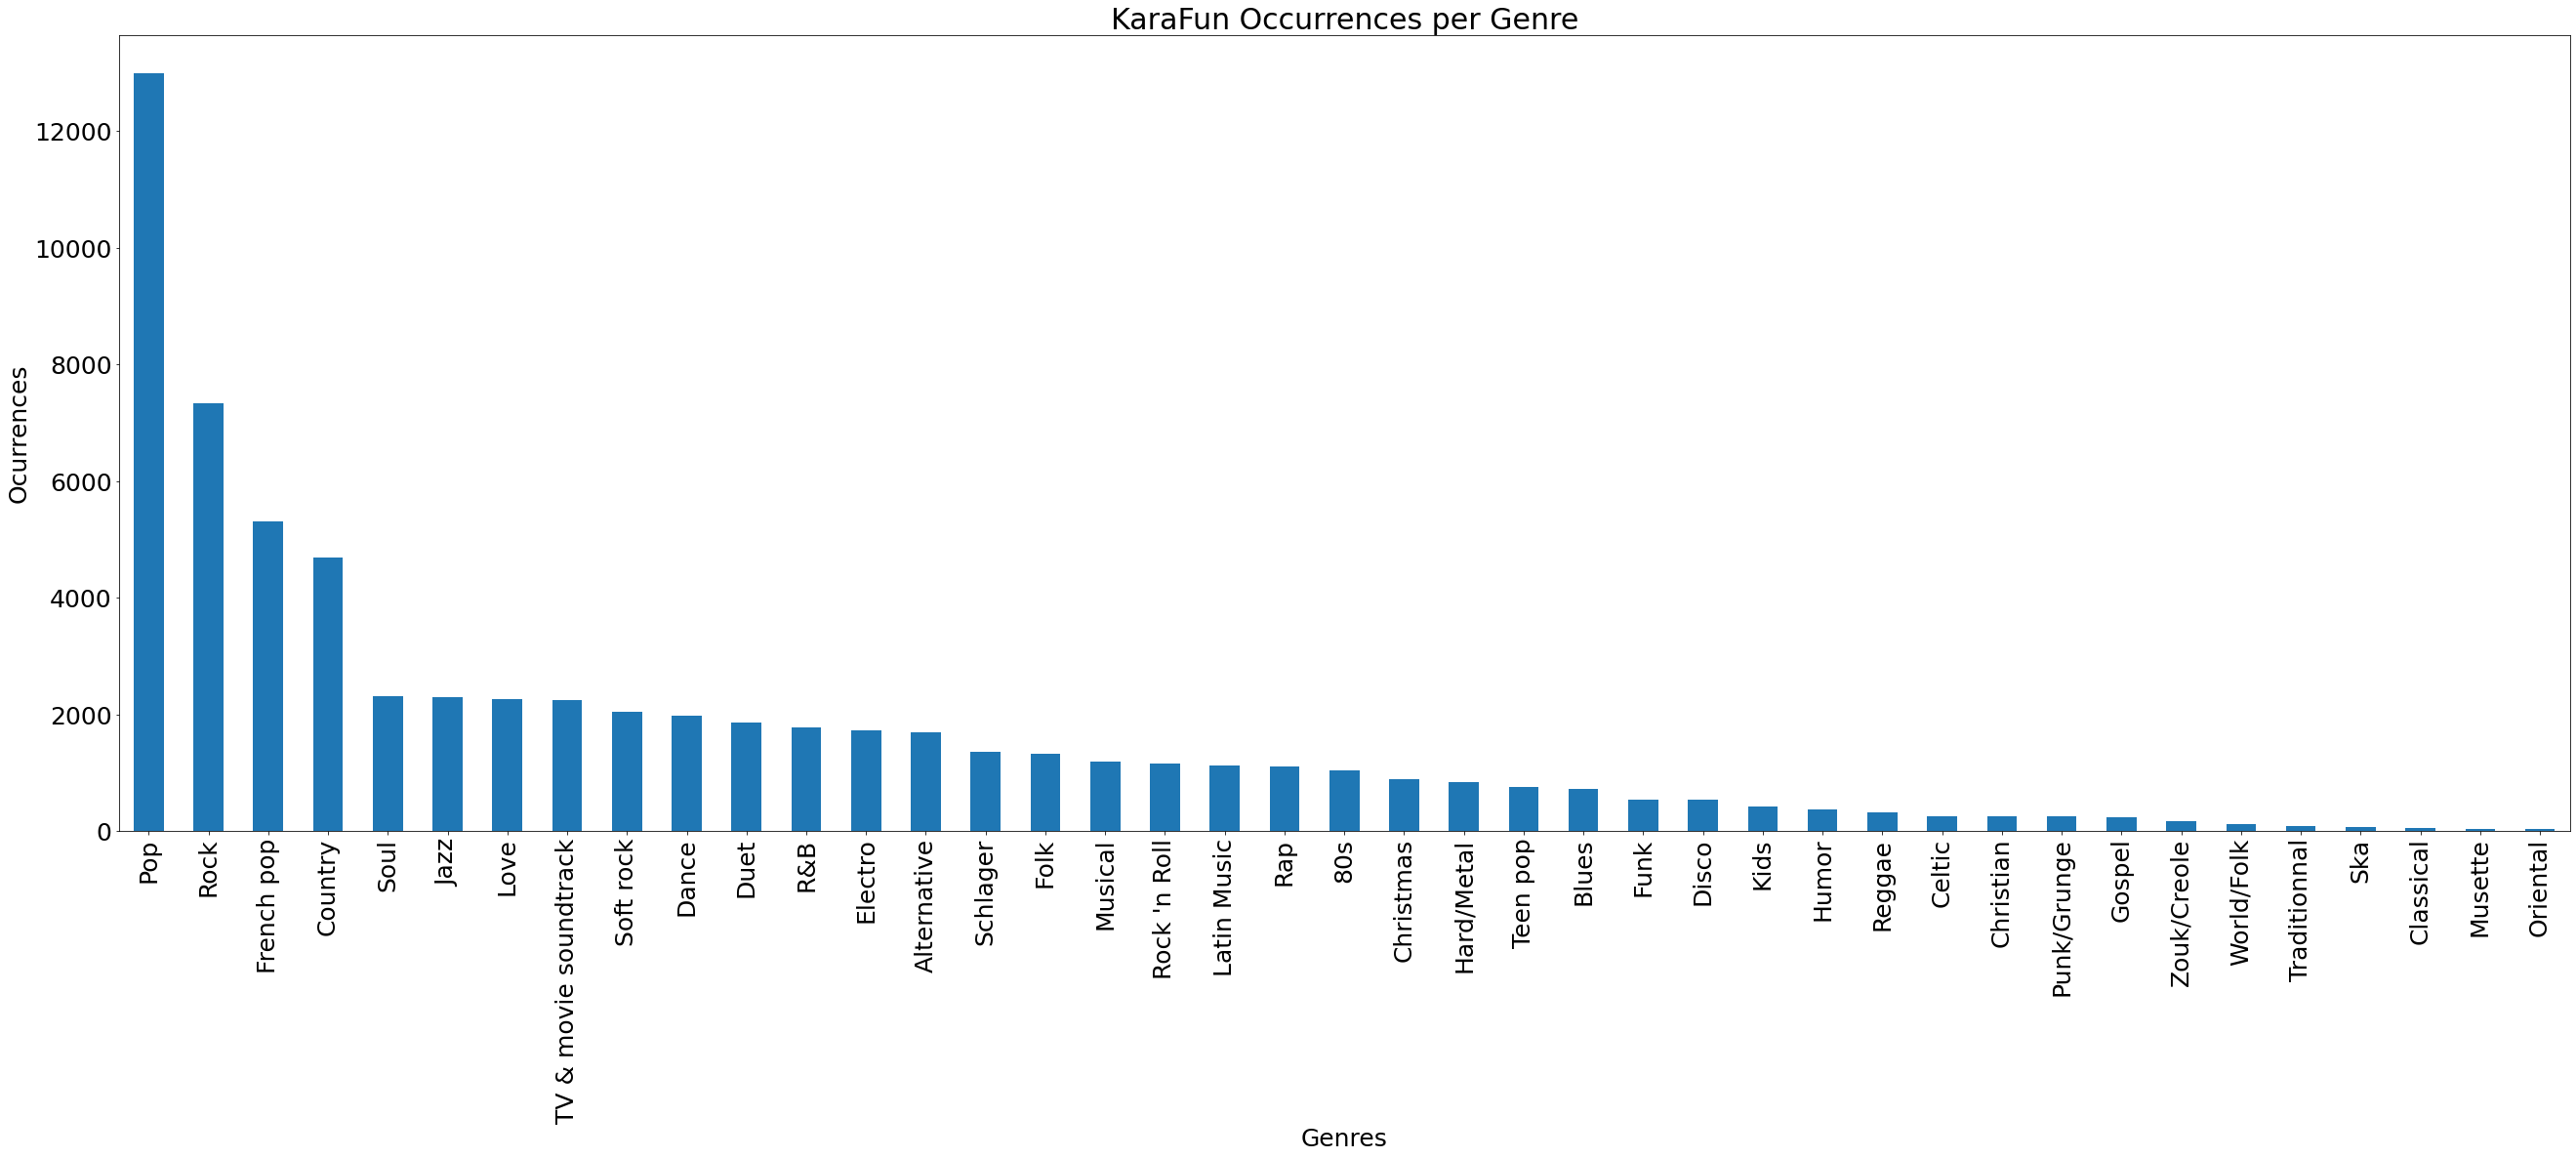

In [1604]:
# Checking the popularity of styles in KaraFun dataset.

styles_sum = styles2.sum()
styles_sum = styles_sum.sort_values(ascending=False)

print(styles_sum)

# Plotting.
plt.rcParams.update({'font.size': 25})
plt.subplots(figsize=(45,15))
styles_sum.plot.bar(title="KaraFun Occurrences per Genre",xlabel="Genres", ylabel="Ocurrences");

# Plotting the trends of some of the styles over a certain period of years.

In [1605]:
# Changing NaN values with zeros for measuring.
styles3 = styles2.fillna(0)

# Storing the release years.
Rock_years = pd.Series(dict((v,k) for k,v in styles3['Rock'].iteritems()))

Ska_years = pd.Series(dict((v,k) for k,v in styles3['Ska'].iteritems()))

Electro_years = pd.Series(dict((v,k) for k,v in styles3['Electro'].iteritems()))

Pop_years = pd.Series(dict((v,k) for k,v in styles3['Pop'].iteritems()))

Eighties_years = pd.Series(dict((v,k) for k,v in styles3['80s'].iteritems()))

Rap_years = pd.Series(dict((v,k) for k,v in styles3['Rap'].iteritems()))

Country_years = pd.Series(dict((v,k) for k,v in styles3['Country'].iteritems()))

French_pop_years = pd.Series(dict((v,k) for k,v in styles3['French pop'].iteritems()))

Celtic_years = pd.Series(dict((v,k) for k,v in styles3['Celtic'].iteritems()))

HardMetal_years = pd.Series(dict((v,k) for k,v in styles3['Hard/Metal'].iteritems()))

In [1606]:
# Toggle this cell to switch between proportions and actual values.

styles2[['Kids', 'Traditionnal', 'Christmas', 'Duet', 'Gospel', 'Celtic', 'Latin Music', 'Blues', 'Rock', 'Jazz', 'Classical',
       'Musette', 'Country', 'French pop', 'Pop', 'Musical',
       'TV & movie soundtrack', 'Folk', 'Humor', 'Schlager', 'Love',
       'Rock \'n Roll', 'World/Folk', 'Soul', 'Soft rock', 'Zouk/Creole',
       'Oriental', 'Reggae', 'R&B', 'Disco', 'Funk', 'Alternative',
       'Punk/Grunge', 'Hard/Metal', 'Ska', 'Teen pop', '80s', 'Electro',
       'Dance', 'Rap']] = styles2[['Kids', 'Traditionnal', 'Christmas', 'Duet', 'Gospel', 'Celtic', 'Latin Music', 'Blues', 'Rock', 'Jazz', 'Classical',
       'Musette', 'Country', 'French pop', 'Pop', 'Musical',
       'TV & movie soundtrack', 'Folk', 'Humor', 'Schlager', 'Love',
       'Rock \'n Roll', 'World/Folk', 'Soul', 'Soft rock', 'Zouk/Creole',
       'Oriental', 'Reggae', 'R&B', 'Disco', 'Funk', 'Alternative',
       'Punk/Grunge', 'Hard/Metal', 'Ska', 'Teen pop', '80s', 'Electro',
       'Dance', 'Rap']].apply(lambda x: x/x.sum(), axis=1)
# styles2.head(3)

Along with the graphs, the average release dates per genre are also added.

Rock:  1987.7169811320755


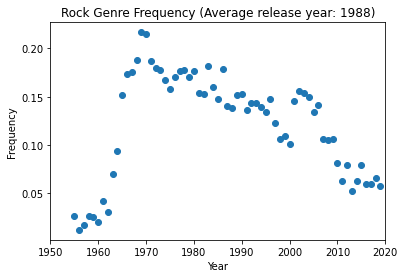

In [1607]:
print(f"Rock:  {Rock_years.mean()}")
int_Rock_mean = int(Rock_years.mean().round())

plt.rcParams.update({'font.size': 10})
ax = styles2['Rock'].plot(style='o', xlim=(1950, 2020))
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_title(f"Rock Genre Frequency (Average release year: {int_Rock_mean})");

Ska:  2002.0


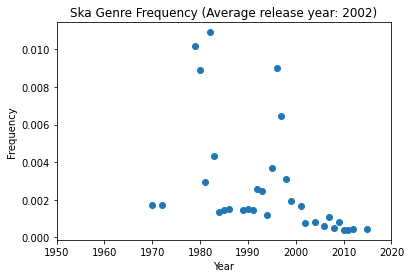

In [1608]:
print(f"Ska:  {Ska_years.mean()}")
int_Ska_mean = int(Ska_years.mean().round())

ax = styles2['Ska'].plot(style='o', xlim=(1950, 2020))
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_title(f"Ska Genre Frequency (Average release year: {int_Ska_mean})");

Electro:  2003.3


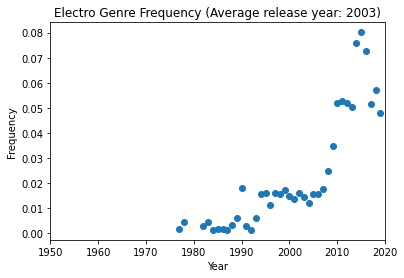

In [1609]:
print(f"Electro:  {Electro_years.mean()}")
int_Electro_mean = int(Electro_years.mean().round())

ax = styles2['Electro'].plot(style='o', xlim=(1950, 2020))
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_title(f"Electro Genre Frequency (Average release year: {int_Electro_mean})");

Pop:  1983.6349206349207


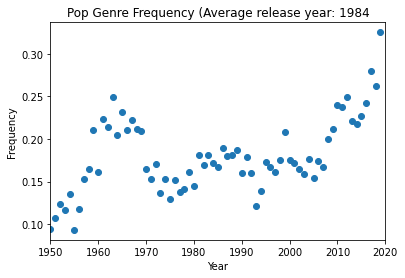

In [1610]:
print(f"Pop:  {Pop_years.mean()}")
int_Pop_mean = int(Pop_years.mean().round())

ax = styles2['Pop'].plot(style='o', xlim=(1950, 2020))
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_title(f"Pop Genre Frequency (Average release year: {int_Pop_mean}");

80s:  1995.3703703703704


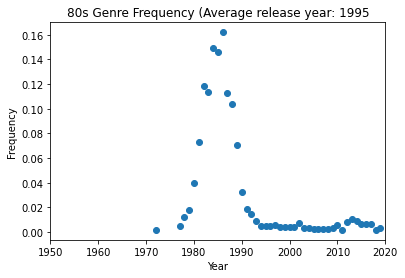

In [1611]:
print(f"80s:  {Eighties_years.mean()}")
int_Eighties_mean = int(Eighties_years.mean().round())

ax = styles2['80s'].plot(style='o', xlim=(1950, 2020))
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_title(f"80s Genre Frequency (Average release year: {int_Eighties_mean}");

Celtic:  2010.2142857142858


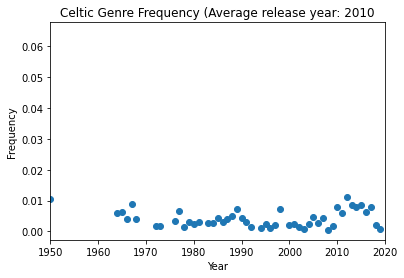

In [1612]:
print(f"Celtic:  {Celtic_years.mean()}")
int_Celtic_mean = int(Celtic_years.mean().round())

ax = styles2['Celtic'].plot(style='o', xlim=(1950, 2020))
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")
ax.set_title(f"Celtic Genre Frequency (Average release year: {int_Celtic_mean}");

# KaraFun YouTube Data Processing

In [1613]:
# Checking the KaraFun YouTube dataset.
ytdf.head(3) 

,video_id,channel_id,published_date,video_title,video_description,likes,views,comment_count,Styles
0,F2vbPzCGj6c,UCbqcG1rdt9LMwOJN4PyGTKg,2012-04-03 09:48:45,A Thousand Years - Christina Perri | Karaoke V...,Download MP3: https://www.karaoke-version.com/...,92468.0,25295671.0,4250.0,"Pop,TV & movie soundtrack"
1,BvW4efU0HTQ,UCbqcG1rdt9LMwOJN4PyGTKg,2013-05-14 13:22:16,Karaoke Colgando en tus manos (duo) - Carlos B...,Descargar MP3: https://www.version-karaoke.es/...,44774.0,25660436.0,792.0,"Duet,Latin Music,Pop"
2,81_2Xb0XB_E,UCbqcG1rdt9LMwOJN4PyGTKg,2011-11-07 16:42:27,Zombie - The Cranberries | Karaoke Version | K...,Download MP3: https://www.karaoke-version.com/...,96514.0,27130172.0,1617.0,"Rock,Alternative"


In [1614]:
# Retrieving the Styles as Pandas series.

ytdf_styles = ytdf['Styles'].str.split(',')
ytdf_styles.head()

0          [Pop, TV & movie soundtrack]
1              [Duet, Latin Music, Pop]
2                   [Rock, Alternative]
3                [Pop, Duet, Soft rock]
4    [TV & movie soundtrack, Love, Pop]
Name: Styles, dtype: object

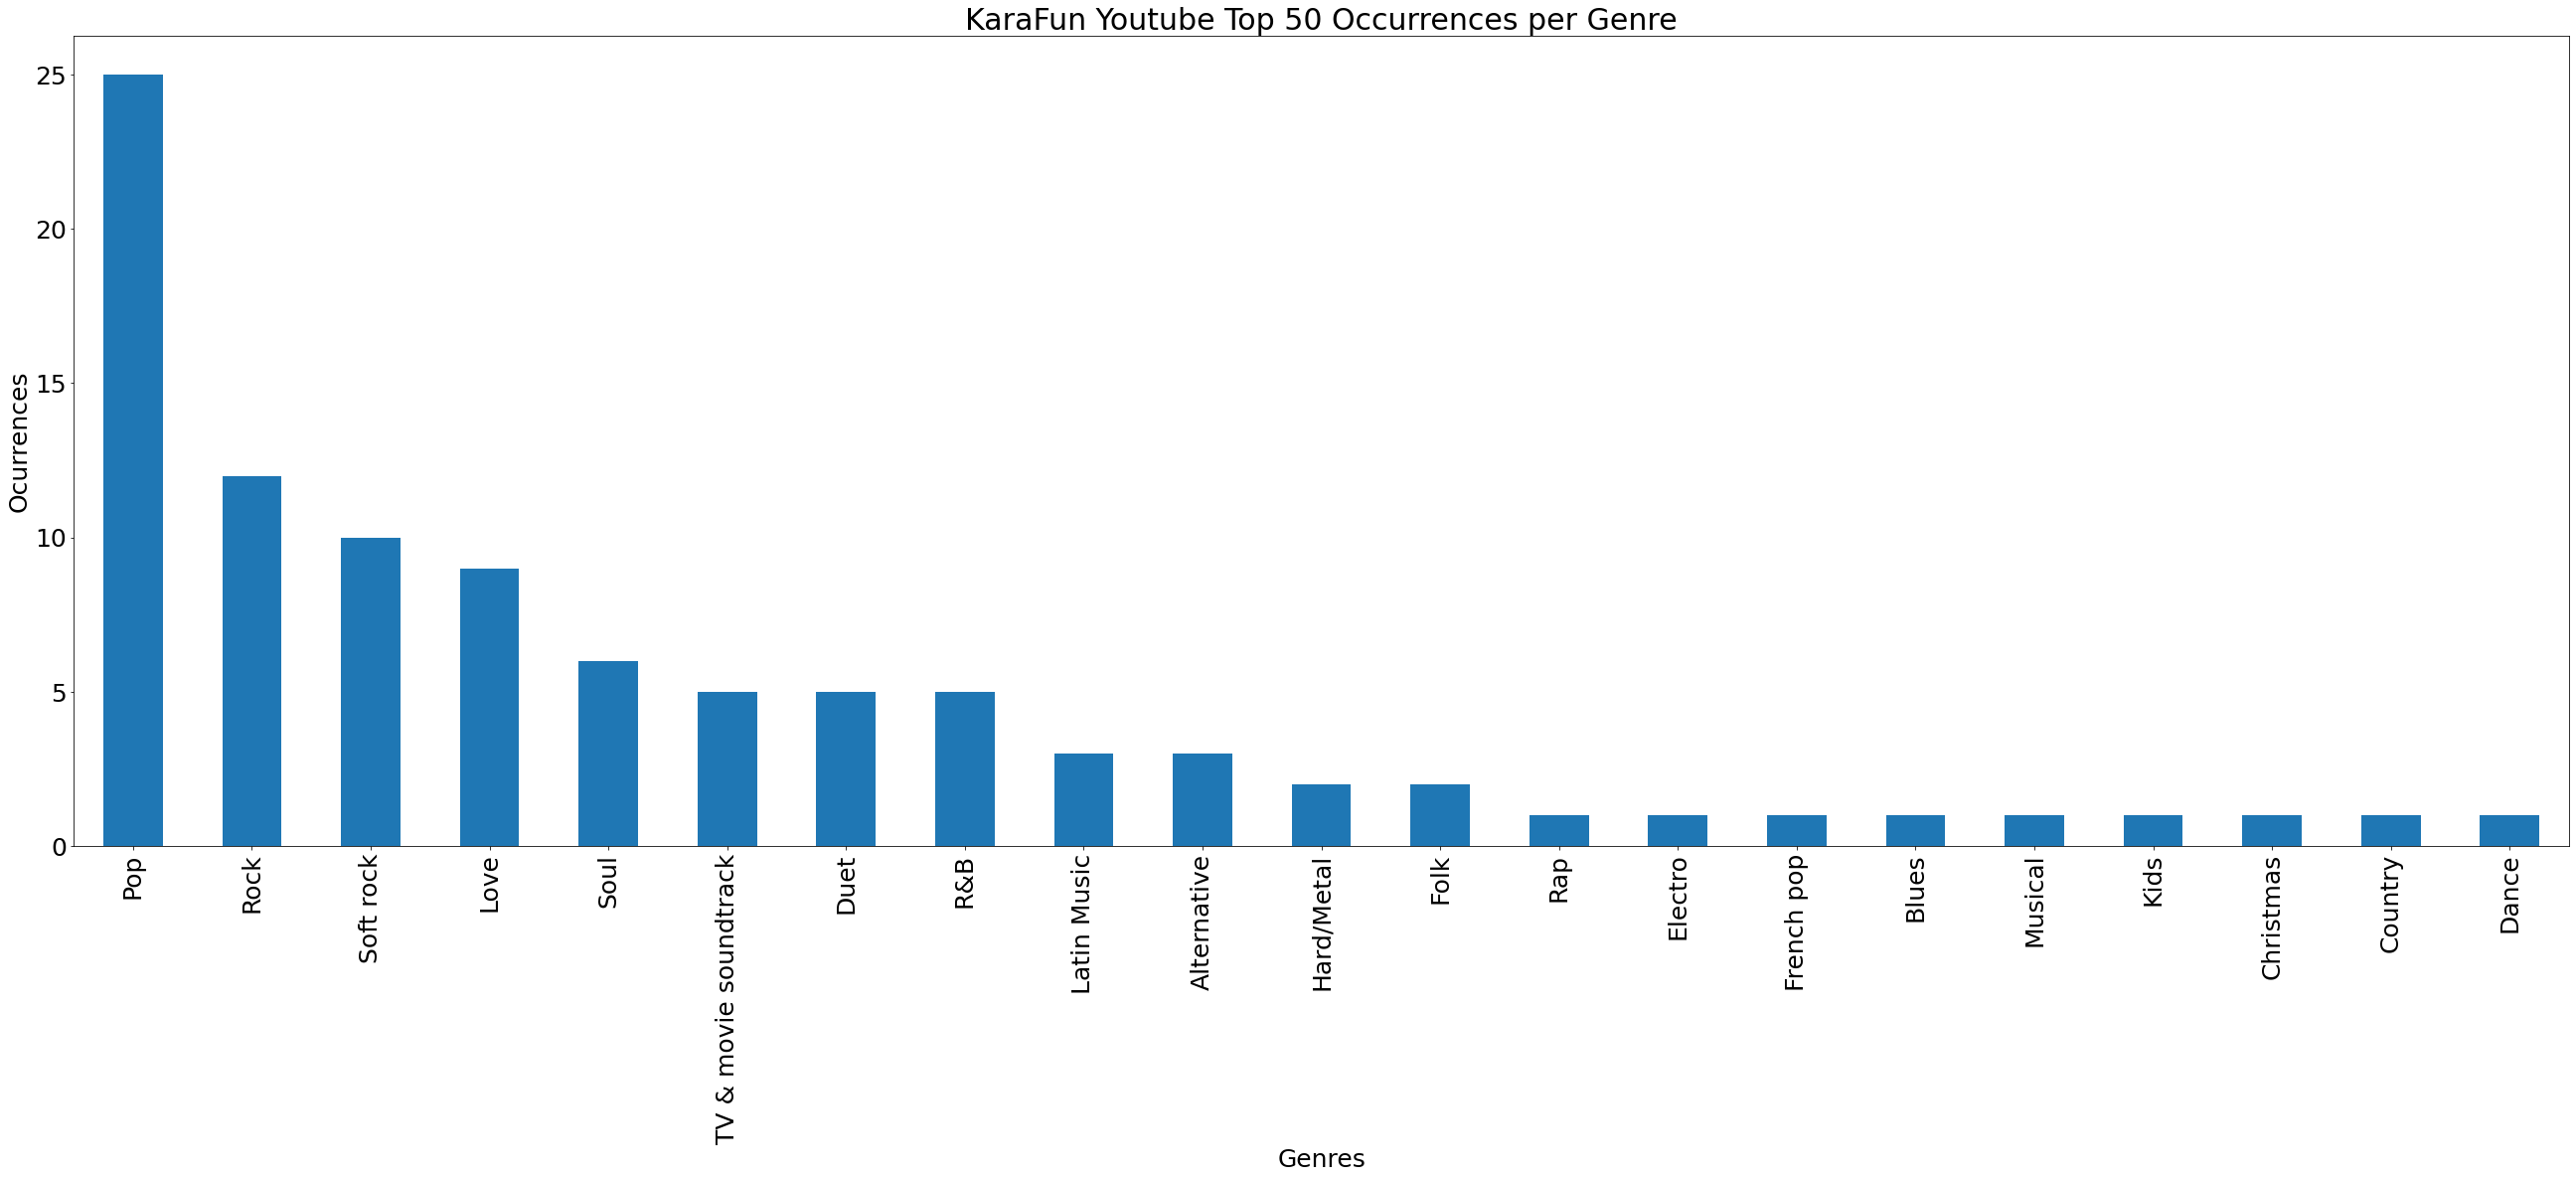

In [1615]:
# Extracting the occurrences of genres.

ytdf_genres = []
for song in ytdf_styles:
  for genre in song:
    ytdf_genres.append(genre)

from collections import Counter, OrderedDict
counts = Counter(ytdf_genres)
counts = OrderedDict(counts.most_common())
counts_series = pd.Series(counts)

plt.rcParams.update({'font.size': 25})
plt.subplots(figsize=(45,15))
counts_series.plot.bar(title="KaraFun Youtube Top 50 Occurrences per Genre", xlabel="Genres", ylabel="Ocurrences");

# KaraFun pickup time

In [1616]:
# Storing the KaraFun dataframe.
df_pickup = df

In [1617]:
# Considering KaraFun started adding music from 2007, we will convert any year before 2007 to 2007 for the pickup time.
df_pickup['Year'] = pd.to_datetime(df_pickup['Year'], format = "%Y", errors = 'coerce')

In [1618]:
# Checking the dataframe.
df_pickup.head(3)

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages,Date Added Legit,month_added,year_added
0,56442,Shallow,A Star is Born,2018-01-01,1,0,2018-10-15,"TV & movie soundtrack,Pop,Folk,Country,Rock,Duet",English,2018-10-15,2018-10,2018
1,49375,Tennessee Whiskey,Chris Stapleton,2015-01-01,0,0,2015-07-21,"Blues,Country,Soul,Rock",English,2015-07-21,2015-07,2015
2,6534,Sweet Caroline,Neil Diamond,1969-01-01,0,0,2011-05-31,Pop,English,2011-05-31,2011-05,2011


In [1619]:
# We change the year column to datetime. While some years are lower than the minimum timestamp of datetime, 1677, there is no problem because they will all be converted into Karafun's 2007

import datetime
karadate = datetime.datetime(2007, 5, 4)

for date in df_pickup['Year']:
  if date < karadate:
    df_pickup['Year'] = df_pickup['Year'].replace([date], karadate)

In [1620]:
# Checking the dataframe.
df_pickup.head(3)

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages,Date Added Legit,month_added,year_added
0,56442,Shallow,A Star is Born,2018-01-01,1,0,2018-10-15,"TV & movie soundtrack,Pop,Folk,Country,Rock,Duet",English,2018-10-15,2018-10,2018
1,49375,Tennessee Whiskey,Chris Stapleton,2015-01-01,0,0,2015-07-21,"Blues,Country,Soul,Rock",English,2015-07-21,2015-07,2015
2,6534,Sweet Caroline,Neil Diamond,2007-05-04,0,0,2011-05-31,Pop,English,2011-05-31,2011-05,2011


In [1621]:
# Now we can see how long it took for Karafun to pickup each song.
df_pickup['pickup'] = df_pickup['Date Added Legit'].sub(df_pickup['Year'], axis=0)
df_pickup['Styles'] = df_pickup['Styles'].str.split(',')
df_pickup.head(3)

,Id,Title,Artist,Year,Duo,Explicit,Date Added,Styles,Languages,Date Added Legit,month_added,year_added,pickup
0,56442,Shallow,A Star is Born,2018-01-01,1,0,2018-10-15,"[TV & movie soundtrack, Pop, Folk, Country, Ro...",English,2018-10-15,2018-10,2018,287 days
1,49375,Tennessee Whiskey,Chris Stapleton,2015-01-01,0,0,2015-07-21,"[Blues, Country, Soul, Rock]",English,2015-07-21,2015-07,2015,201 days
2,6534,Sweet Caroline,Neil Diamond,2007-05-04,0,0,2011-05-31,[Pop],English,2011-05-31,2011-05,2011,1488 days


# Analysing overall pickup time

In [1622]:
# Storing the genres in a list.
genres = ['Kids', 'Traditionnal', 'Christmas', 'Duet', 'Gospel', 'Celtic', 'Latin Music', 'Blues', 'Rock', 'Jazz', 'Classical',
       'Musette', 'Country', 'French pop', 'Pop', 'Musical',
       'TV & movie soundtrack', 'Folk', 'Humor', 'Schlager', 'Love',
       'Rock \'n Roll', 'World/Folk', 'Soul', 'Soft rock', 'Zouk/Creole',
       'Oriental', 'Reggae', 'R&B', 'Disco', 'Funk', 'Alternative',
       'Punk/Grunge', 'Hard/Metal', 'Ska', 'Teen pop', '80s', 'Electro',
       'Dance', 'Rap']

In [1623]:
# Extracting the pick up times per genre.

average_pickup = {}
for i in genres:
  average = df_pickup.loc[df_pickup['Styles'].apply(lambda x: i in x)]
  average_pickup[i] = int(average['pickup'].mean() / np.timedelta64(1,'D'))

sorted_dict = sorted(average_pickup.items(), key=lambda x:x[1])
sorted_pickup = dict(sorted_dict)

In [1624]:
sorted_pickup
# Days per genres

{'80s': 2401,
 'Alternative': 1903,
 'Blues': 2213,
 'Celtic': 1548,
 'Christmas': 2174,
 'Classical': 2105,
 'Country': 1788,
 'Dance': 1318,
 'Disco': 2231,
 'Duet': 1666,
 'Electro': 1041,
 'Folk': 1815,
 'French pop': 2139,
 'Funk': 1990,
 'Gospel': 1815,
 'Hard/Metal': 2419,
 'Humor': 2289,
 'Jazz': 1999,
 'Kids': 2124,
 'Latin Music': 1903,
 'Love': 2202,
 'Musette': 2225,
 'Musical': 1881,
 'Oriental': 2645,
 'Pop': 1597,
 'Punk/Grunge': 2311,
 'R&B': 1638,
 'Rap': 1680,
 'Reggae': 1836,
 'Rock': 2095,
 "Rock 'n Roll": 2195,
 'Schlager': 1846,
 'Ska': 2764,
 'Soft rock': 1918,
 'Soul': 1812,
 'TV & movie soundtrack': 1801,
 'Teen pop': 1572,
 'Traditionnal': 1665,
 'World/Folk': 2203,
 'Zouk/Creole': 2320}

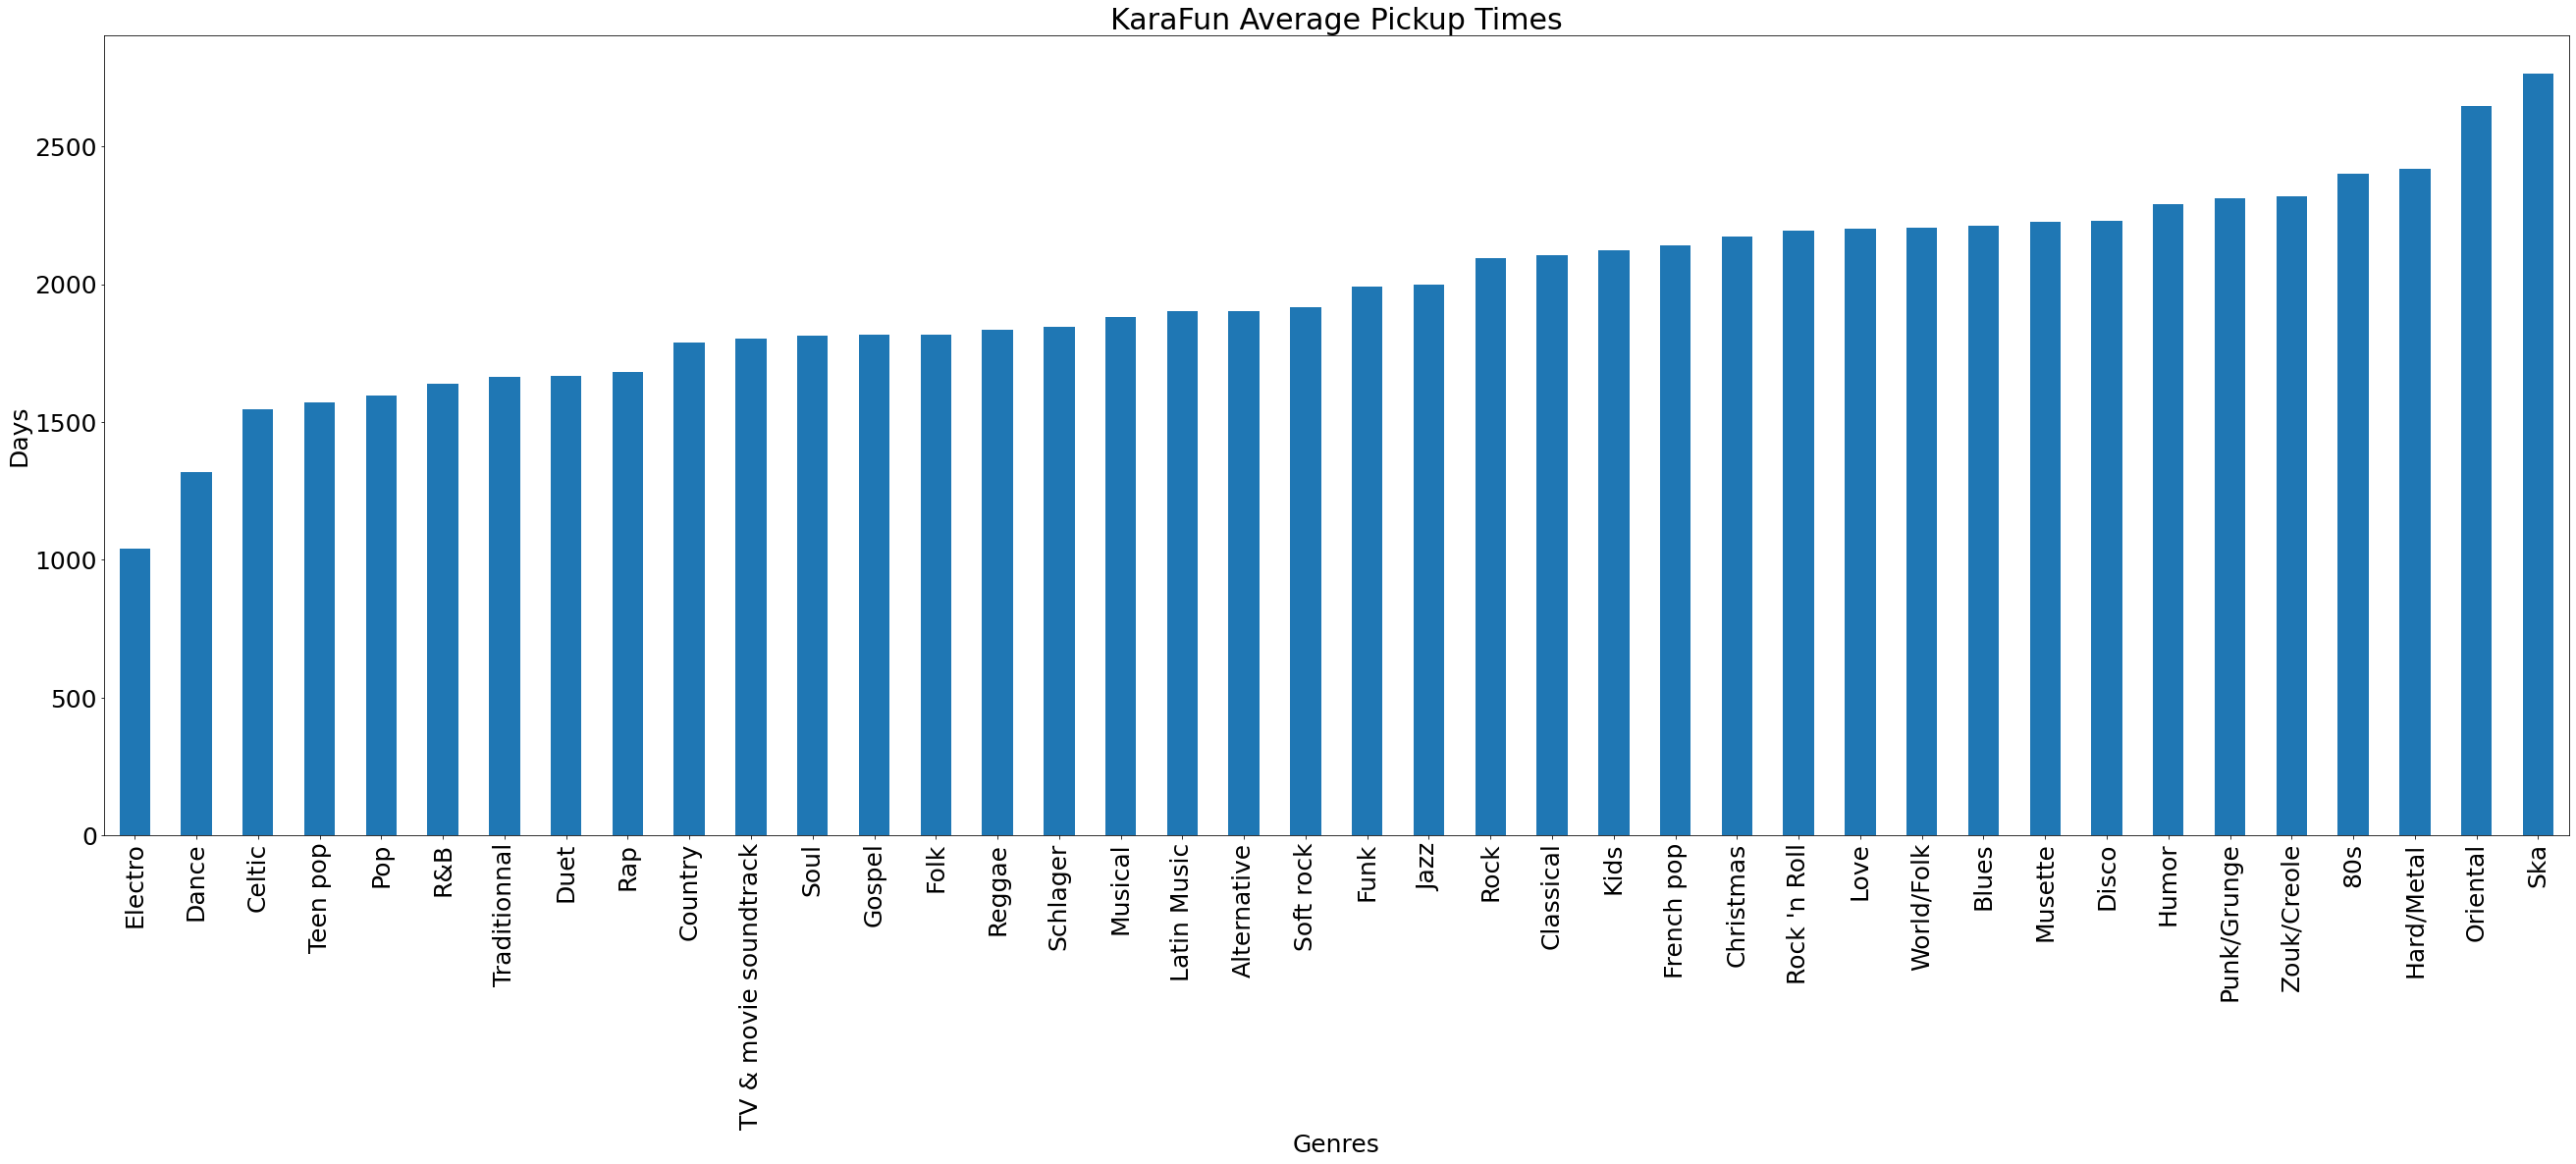

In [1625]:
# Plotting the pick up times per genre.

pickup_series = pd.Series(sorted_pickup)

plt.subplots(figsize=(45,15))
pickup_series.plot.bar(title="KaraFun Average Pickup Times", xlabel="Genres", ylabel="Days");

In [1626]:
# Total number of songs for top 5 genres picked up fastest and slowest

print(styles2['Electro'].sum())
print(styles2['Dance'].sum())
print(styles2['Celtic'].sum())
print(styles2['Teen pop'].sum())
print(styles2['Pop'].sum())
print("------------")
print(styles2['Zouk/Creole'].sum())
print(styles2['80s'].sum())
print(styles2['Hard/Metal'].sum())
print(styles2['Oriental'].sum())
print(styles2['Ska'].sum())

0.9183370304179365
1.192923207566084
0.26949201074491785
0.48956717327930316
14.615954003456563
------------
0.17580417449443358
1.3229009588911569
0.9279543805025834
0.05114189117615616
0.08775378666912868


# Spotify Popularity

In [1627]:
# Checking the dataframe.
print(len(spotify_df.index))
spotify_df.head(3)

10256


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,instrumentalness,key,liveness,mode,speechiness
0,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,596,653,213947,0.0,B,811,Minor,409
1,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,975,377,334570,208.0,E,102,Minor,387
2,R&B,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,69,359,761,219120,0.0,F,945,Minor,539


In [1628]:
# Checking the unique genres and their counts.
print(len(spotify_df.genre.unique()))
print(spotify_df['genre'].value_counts())

23
Pop                 2925
Rock                1183
Rap                 1172
Dance               1141
Hip-Hop              861
Indie                553
Children’s Music     548
R&B                  524
Folk                 299
Alternative          222
Soul                 196
Country              190
Reggaeton            187
Blues                 53
Electronic            49
Reggae                42
Jazz                  32
World                 27
Soundtrack            14
Movie                 13
Ska                   12
Classical             12
Anime                  1
Name: genre, dtype: int64


In [1629]:
# Making the 'popularity' column the index.
spotify_df2 = spotify_df.set_index('popularity')
spotify_df2.head(3)

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,instrumentalness,key,liveness,mode,speechiness
popularity,,,,,,,,,,,,
68,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,596,653,213947,0.0,B,811,Minor,409
66,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,975,377,334570,208.0,E,102,Minor,387
69,R&B,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,359,761,219120,0.0,F,945,Minor,539


In [1630]:
# Grouping the genres.

spotify_styles = spotify_df2['genre'].str.split(',')
spotify_groups = spotify_styles.groupby('popularity')
spotify_styles = spotify_groups.sum()
spotify_styles = spotify_styles.apply(pd.Series.value_counts)

spotify_styles = spotify_styles.reindex(index=spotify_styles.index[::-1])
spotify_styles.head(3)

,Pop,Rock,Dance,Rap,Children’s Music,Hip-Hop,Indie,R&B,Folk,Alternative,...,Electronic,Reggae,Jazz,Blues,World,Classical,Soundtrack,Movie,Anime,Ska
popularity,,,,,,,,,,,,,,,,,,,,,
99,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,6.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1631]:
# Extracting the popularity of genres in comparison to the entire dataset.

total_songs = spotify_styles.sum().sum()

spotify_styles = spotify_styles.fillna(0)

popularity_list = []
column_names = list(spotify_styles.columns.values.tolist())
for genre in column_names:
  genre_popularity_list = []
  for index, value in spotify_styles[genre].items():
    genre_popularity_list.append(index*value)
  popularity_list.append((sum(genre_popularity_list))/total_songs)

spotify_popularity_dict = dict(zip(column_names, popularity_list))

dictionary_items = spotify_popularity_dict.items()
sorted_items = sorted(dictionary_items)

sorted_spotify = sorted(spotify_popularity_dict.items(), key=lambda y: y[1], reverse=True)
sorted_spotify

[('Pop', 20.308307332293293),
 ('Rap', 8.112031981279252),
 ('Rock', 8.031396255850234),
 ('Dance', 7.925897035881436),
 ('Hip-Hop', 5.943057722308892),
 ('Indie', 3.7116809672386895),
 ('Children’s Music', 3.675897035881435),
 ('R&B', 3.581805772230889),
 ('Folk', 2.002047581903276),
 ('Alternative', 1.4836193447737909),
 ('Reggaeton', 1.3398985959438376),
 ('Soul', 1.3115249609984398),
 ('Country', 1.28100624024961),
 ('Blues', 0.3537441497659906),
 ('Electronic', 0.3292706708268331),
 ('Reggae', 0.28071372854914195),
 ('Jazz', 0.21012090483619345),
 ('World', 0.1794071762870515),
 ('Soundtrack', 0.09155616224648985),
 ('Movie', 0.08794851794071763),
 ('Ska', 0.0814157566302652),
 ('Classical', 0.07761310452418096),
 ('Anime', 0.006337753510140405)]

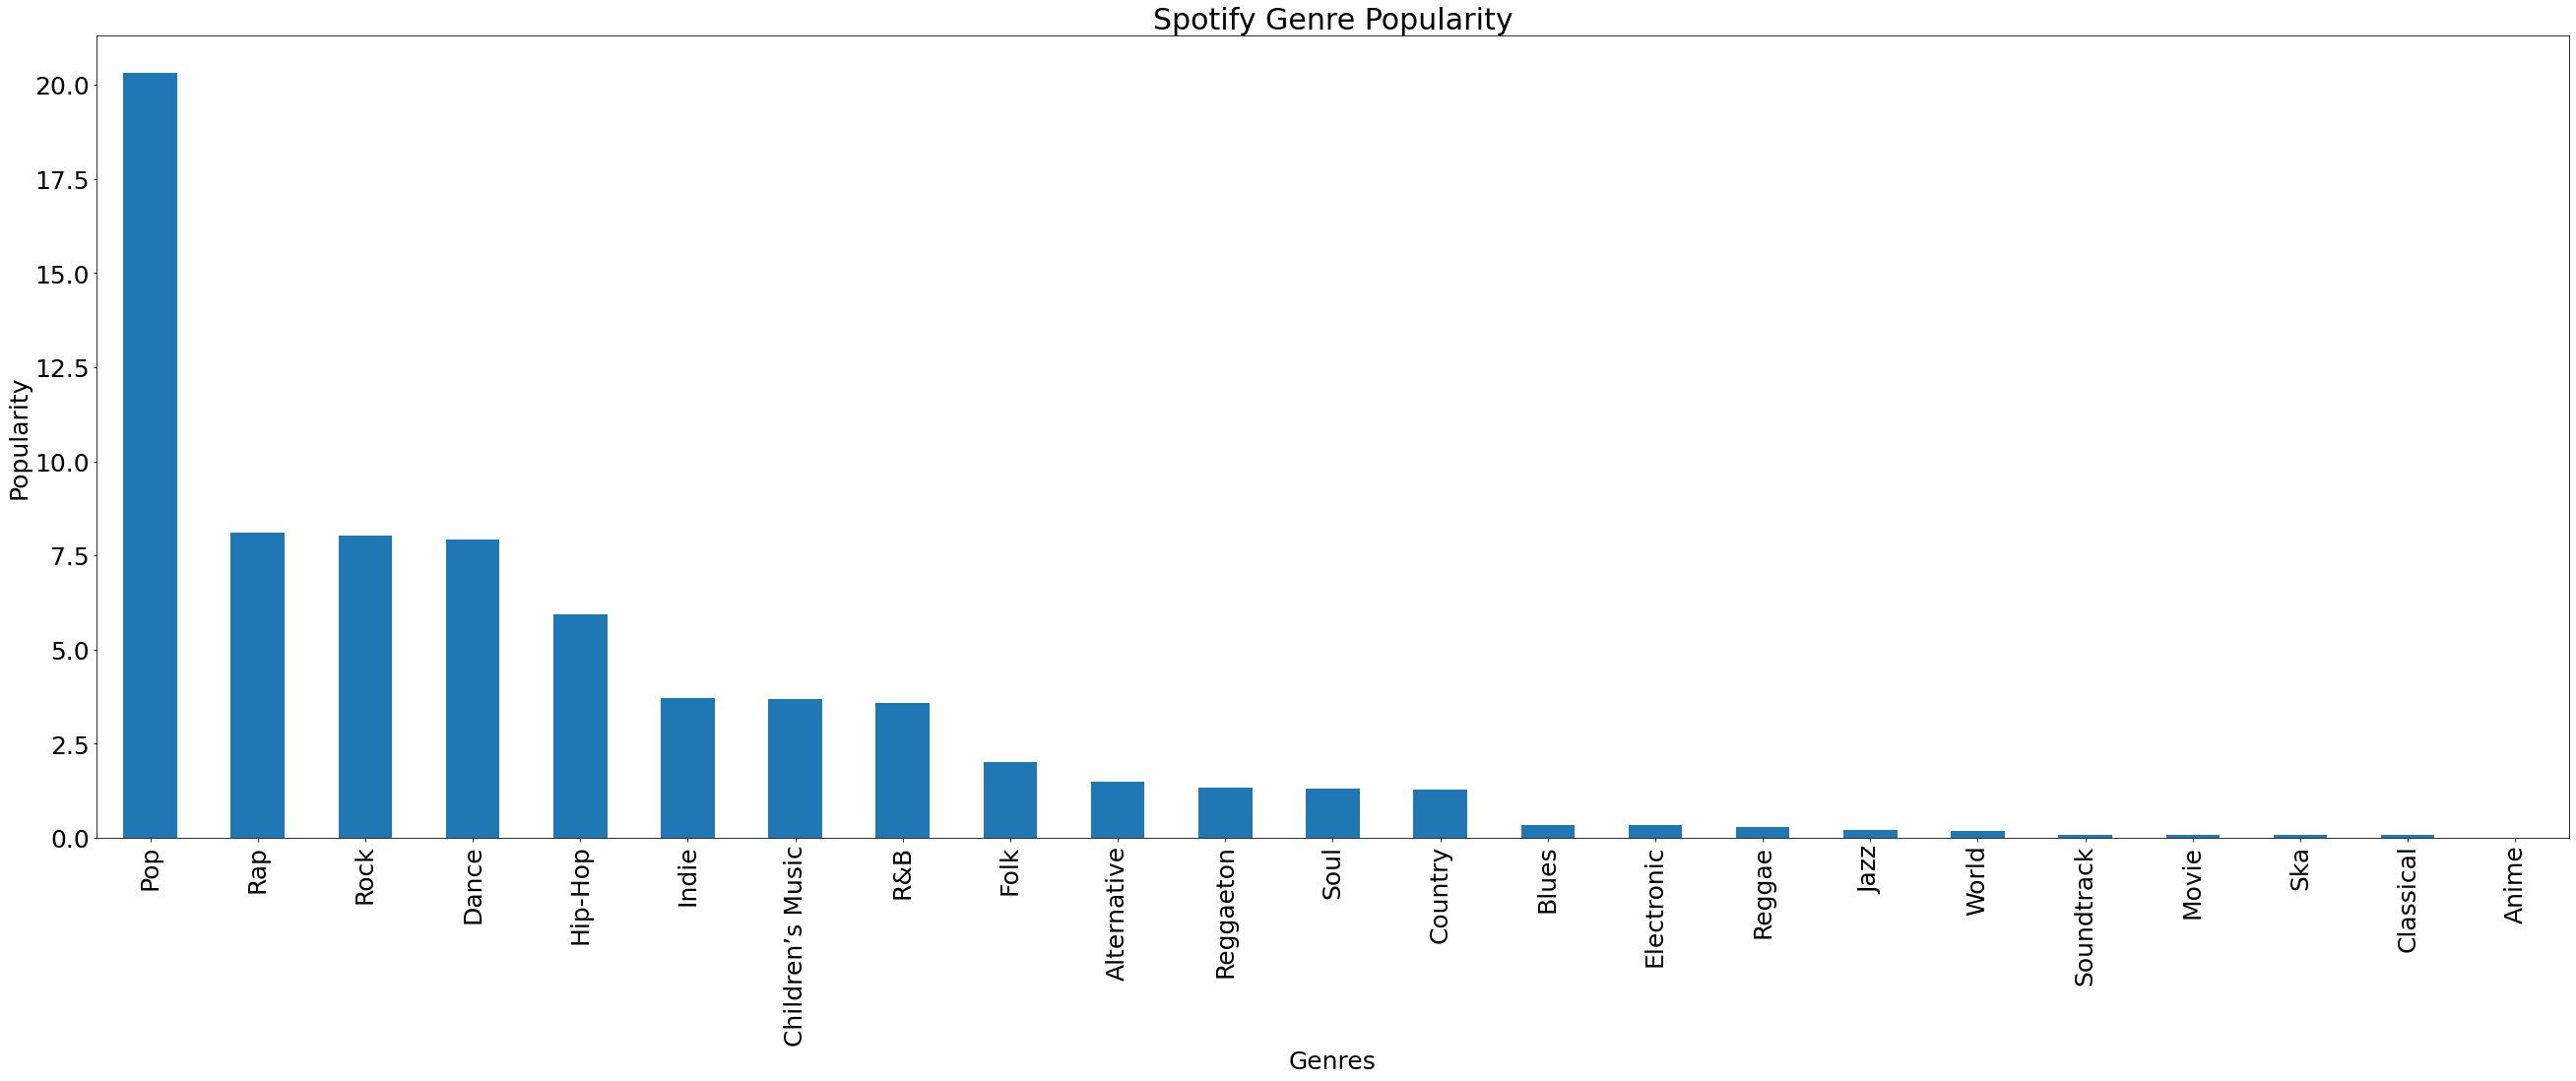

In [1632]:
# Plotting the Spotify popularity

x_val = [x[0] for x in sorted_spotify]
y_val = [x[1] for x in sorted_spotify]

spotify_series = pd.Series(y_val, x_val)

plt.subplots(figsize=(45,15))
spotify_series.plot.bar(title="Spotify Genre Popularity", xlabel="Genres", ylabel="Popularity");

# Spotify Top 50 Songs

In [1633]:
# Retrieving the top 50 songs based on popularity.

spotify_50 = spotify_df2.sort_index(ascending=False)[:50]
spotify_50.head(3)

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,instrumentalness,key,liveness,mode,speechiness
popularity,,,,,,,,,,,,
99,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,421,726,190440,0.000000,F,106,Minor,917
99,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,421,726,190440,0.000000,F,106,Minor,917
98,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,11,737,193227,0.000194,G#,574,Minor,593


In [1634]:
# Processing the data to get popularities per genre.

spotify_50_styles = spotify_50['genre'].str.split(',')
spotify_50_groups = spotify_50_styles.groupby('popularity')
spotify_50_styles = spotify_50_groups.sum()
spotify_50_styles = spotify_50_styles.apply(pd.Series.value_counts)
spotify_50_styles = spotify_50_styles.reindex(index=spotify_50_styles.index[::-1])
spotify_50_styles.head(10)

,Pop,Dance,Hip-Hop,Rap,Reggaeton,R&B,Rock,Indie
popularity,,,,,,,,
99,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
98,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
97,6.0,2.0,NaN,1.0,NaN,NaN,NaN,1.0
95,3.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN
94,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
93,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
92,5.0,3.0,NaN,NaN,1.0,1.0,NaN,NaN
91,4.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN


In [1635]:
# Processing the top 50 Spotify songs to get the popularities per genre.

total_songs_50 = spotify_50_styles.sum().sum()

spotify_50_styles = spotify_50_styles.fillna(0)

popularity_list_50 = []
column_names_50 = list(spotify_50_styles.columns.values.tolist())
for genre in column_names_50:
  genre_popularity_list_50 = []
  for index, value in spotify_50_styles[genre].items():
    genre_popularity_list_50.append(index*value)
  popularity_list_50.append((sum(genre_popularity_list_50))/total_songs_50)

spotify_popularity_dict_50 = dict(zip(column_names_50, popularity_list_50))

dictionary_items_50 = spotify_popularity_dict_50.items()
sorted_items_50 = sorted(dictionary_items_50)

sorted_spotify_50 = sorted(spotify_popularity_dict_50.items(), key=lambda y: y[1], reverse=True)
sorted_spotify_50

[('Pop', 41.5),
 ('Dance', 20.62),
 ('Hip-Hop', 9.4),
 ('Rap', 9.34),
 ('Reggaeton', 7.52),
 ('Indie', 1.94),
 ('Rock', 1.9),
 ('R&B', 1.84)]

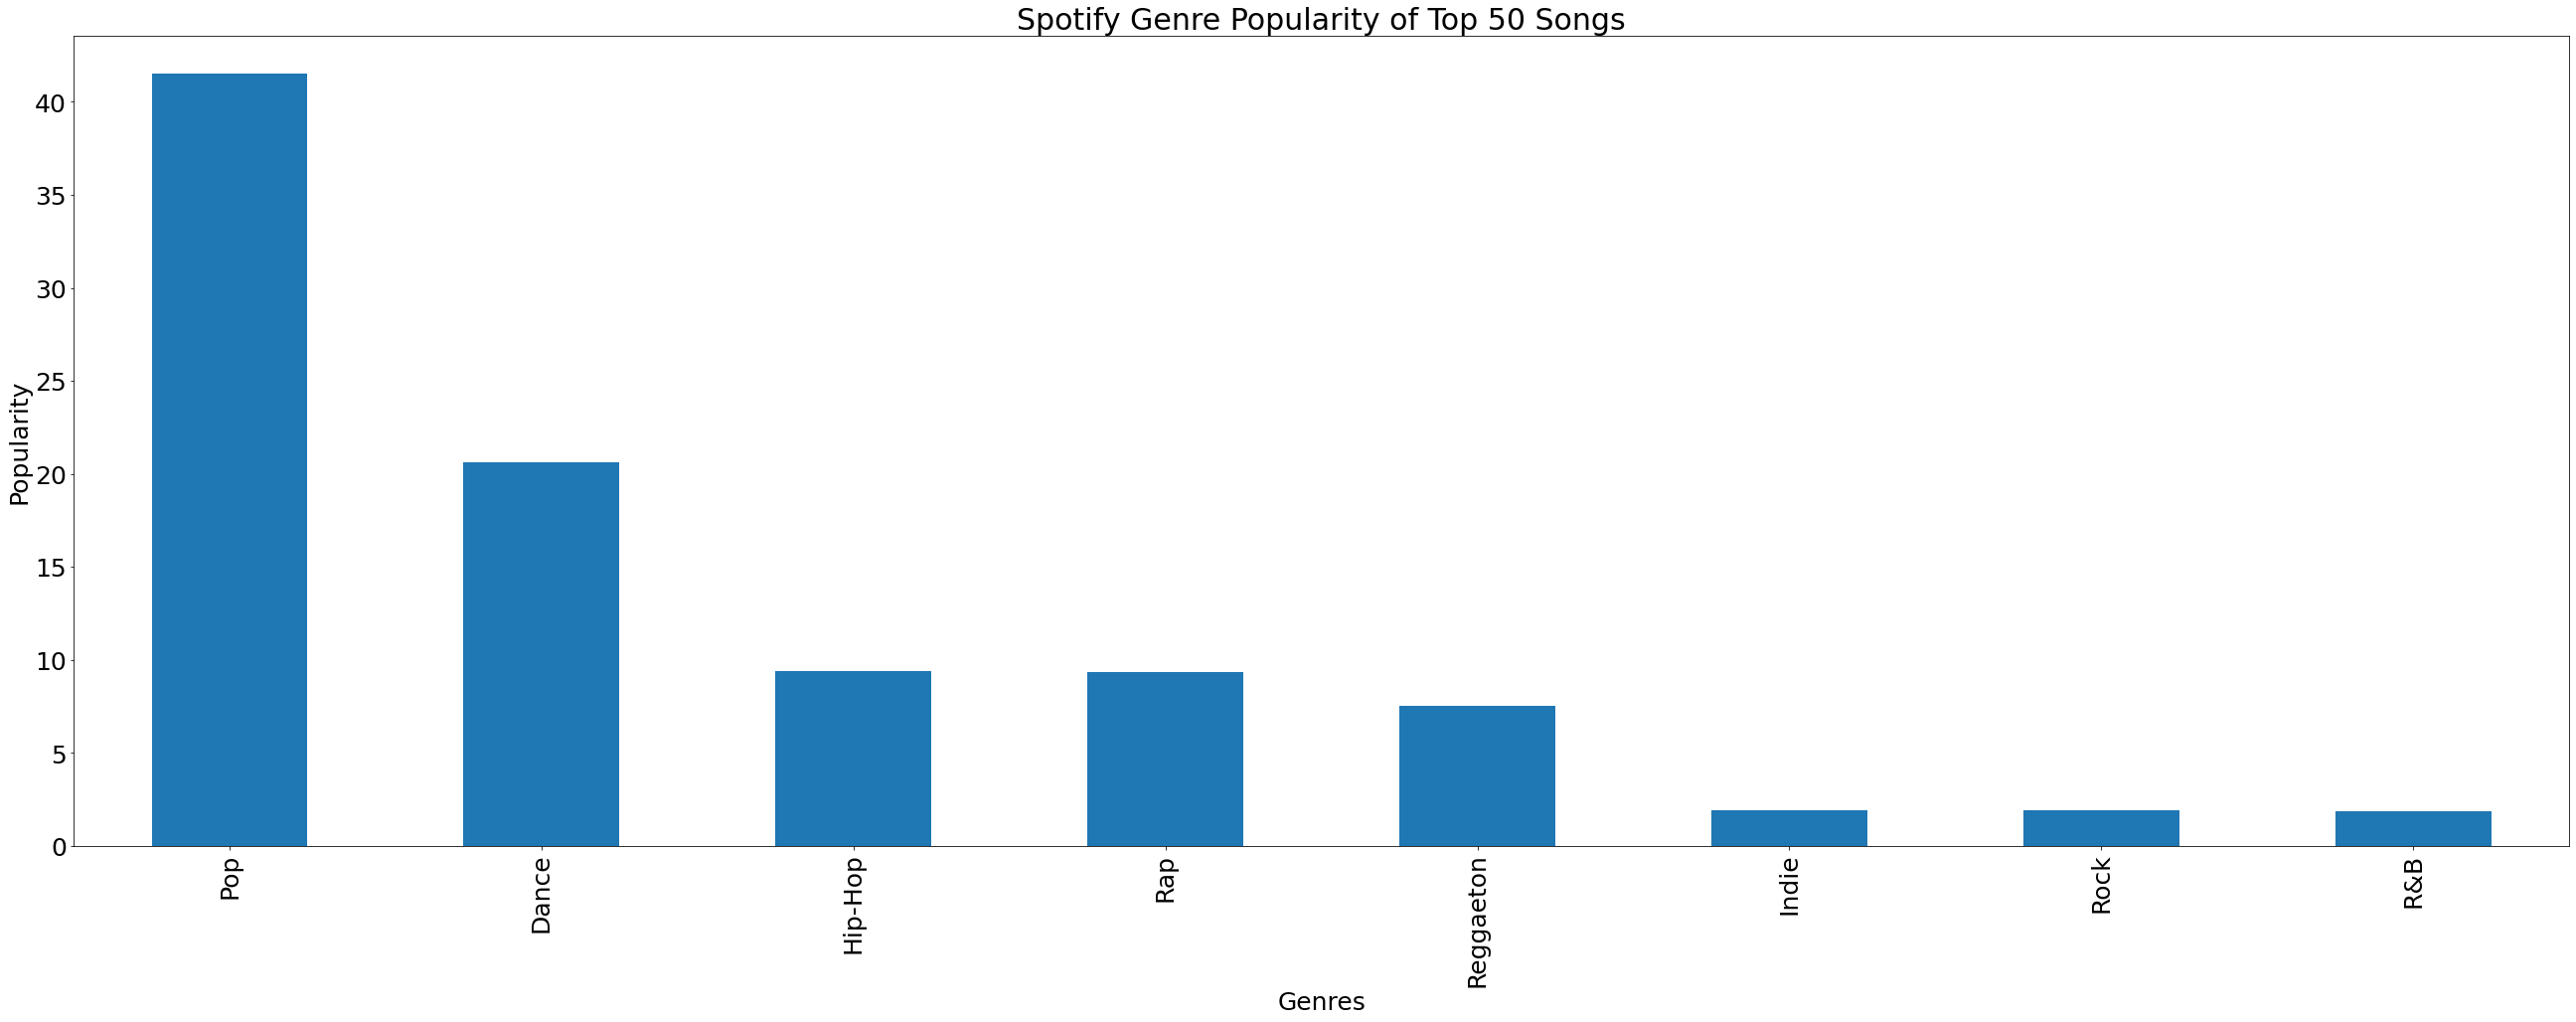

In [1636]:
# Plotting the popularity of top 50 Spotify songs.

x_val_50 = [x[0] for x in sorted_spotify_50]
y_val_50 = [x[1] for x in sorted_spotify_50]

spotify_series_50 = pd.Series(y_val_50, x_val_50)

plt.subplots(figsize=(45,15))
spotify_series_50.plot.bar(title="Spotify Genre Popularity of Top 50 Songs", xlabel="Genres", ylabel="Popularity");

# Unique Genres in Both Datasets

In [1637]:
# Making a list of Spotify genres
spotify_genres = list(spotify_df.genre.unique())

In [1638]:
# Getting the unique KaraFun genres.
karafun_genres_unique = [x for x in genres if x not in spotify_genres]
karafun_genres_unique

['Kids',
 'Traditionnal',
 'Christmas',
 'Duet',
 'Gospel',
 'Celtic',
 'Latin Music',
 'Musette',
 'French pop',
 'Musical',
 'TV & movie soundtrack',
 'Humor',
 'Schlager',
 'Love',
 "Rock 'n Roll",
 'World/Folk',
 'Soft rock',
 'Zouk/Creole',
 'Oriental',
 'Disco',
 'Funk',
 'Punk/Grunge',
 'Hard/Metal',
 'Teen pop',
 '80s',
 'Electro']

In [1639]:
# Getting the unique Spotify genres.
spotify_genres_unique = [x for x in spotify_genres if x not in genres]
spotify_genres_unique

['Electronic',
 'Anime',
 'Hip-Hop',
 'Children’s Music',
 'Indie',
 'Reggaeton',
 'Movie',
 'Soundtrack',
 'World']

In [1640]:
# Removing the same genres with different wording manually from the KaraFun dataset.

karafun_genres_unique.remove("Kids")
karafun_genres_unique.remove("TV & movie soundtrack")
karafun_genres_unique.remove("World/Folk")
karafun_genres_unique.remove("Electro")

karafun_genres_unique

['Traditionnal',
 'Christmas',
 'Duet',
 'Gospel',
 'Celtic',
 'Latin Music',
 'Musette',
 'French pop',
 'Musical',
 'Humor',
 'Schlager',
 'Love',
 "Rock 'n Roll",
 'Soft rock',
 'Zouk/Creole',
 'Oriental',
 'Disco',
 'Funk',
 'Punk/Grunge',
 'Hard/Metal',
 'Teen pop',
 '80s']

In [1641]:
# Removing the same genres with different wording manually from the Spotify dataset.

spotify_genres_unique.remove("Children’s Music")
spotify_genres_unique.remove("Movie")
spotify_genres_unique.remove("Soundtrack")
spotify_genres_unique.remove("World")
spotify_genres_unique.remove("Electronic")

spotify_genres_unique

['Anime', 'Hip-Hop', 'Indie', 'Reggaeton']